In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


import numpy as np
import pandas as pd
import tensorflow as tf

import atecml.data
import atecml.fs

from contextlib import contextmanager
from tqdm import tqdm
from time import strftime,time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

plt.style.use('ggplot')

In [2]:
train_df,test_df = atecml.data.load()
predictors = [x for x in train_df.columns if x not in atecml.data.NOT_FEATURE_COLUMNS]
target ='Fraud'

In [3]:
fs = atecml.fs.FeatureSelector(data=train_df[predictors],labels=train_df[target])
#fs = joblib.load('./fs.model')

# 处理缺失值

In [7]:
fs.identify_missing(missing_threshold=0.2)

162 features with greater than 0.20 missing values.



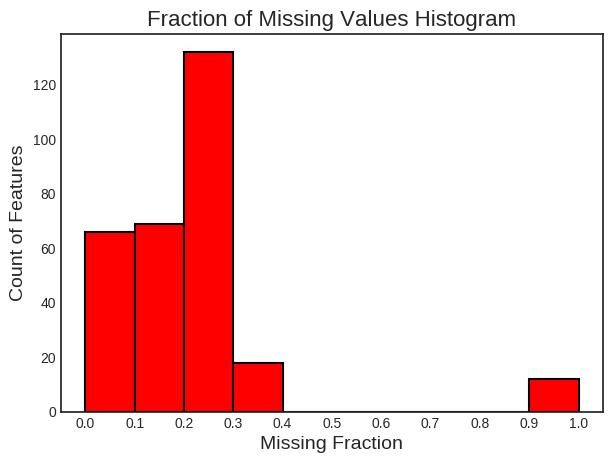

In [5]:
#缺失率分布
fs.plot_missing()

In [6]:
fs.missing_stats.head(50)

,missing_fraction
f47,0.930685
f36,0.930685
f37,0.930685
f38,0.930685
f39,0.930685
f40,0.930685
f41,0.930685
f42,0.930685
f43,0.930685
f44,0.930685


In [8]:
missing_features = fs.ops ['missing']
missing_features

['f5',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47',
 'f48',
 'f49',
 'f50',
 'f51',
 'f52',
 'f53',
 'f54',
 'f55',
 'f56',
 'f57',
 'f58',
 'f59',
 'f60',
 'f61',
 'f62',
 'f63',
 'f64',
 'f65',
 'f66',
 'f67',
 'f68',
 'f69',
 'f70',
 'f71',
 'f72',
 'f73',
 'f74',
 'f75',
 'f76',
 'f77',
 'f78',
 'f79',
 'f80',
 'f81',
 'f82',
 'f83',
 'f84',
 'f85',
 'f86',
 'f87',
 'f88',
 'f89',
 'f90',
 'f91',
 'f92',
 'f93',
 'f94',
 'f95',
 'f96',
 'f97',
 'f98',
 'f99',
 'f100',
 'f101',
 'f102',
 'f103',
 'f104',
 'f105',
 'f106',
 'f107',
 'f108',
 'f109',
 'f110',
 'f111',
 'f112',
 'f113',
 'f114',
 'f115',
 'f116',
 'f117',
 'f118',
 'f119',
 'f120',
 'f121',
 'f122',
 'f123',
 'f124',
 'f125',
 'f126',
 'f127',
 'f128',
 'f129',
 'f130',
 'f131',
 'f132',
 'f133',
 'f134',
 'f135',
 'f136',
 'f137',
 'f138',
 '

# 处理高相关的特征

In [10]:
fs.identify_collinear(correlation_threshold = 0.98)

114 features with a correlation magnitude greater than 0.98.



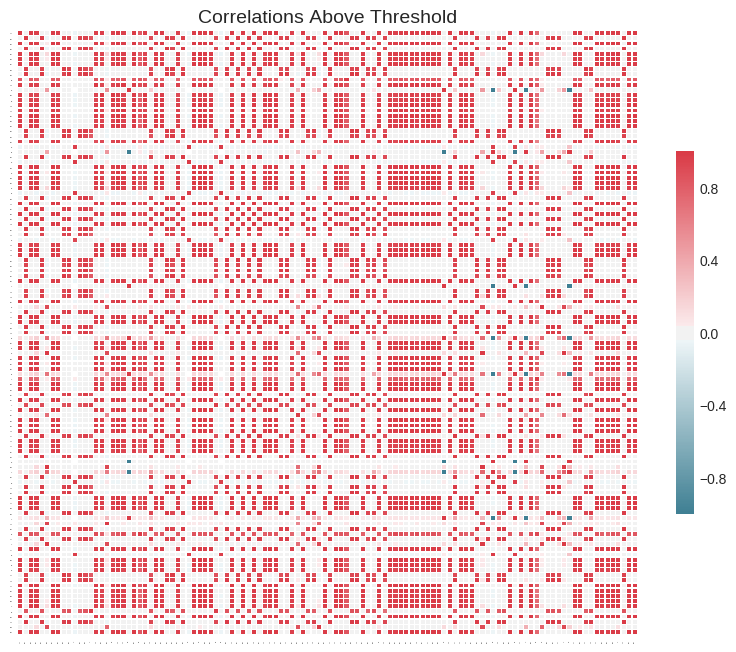

In [11]:
fs.plot_collinear()

In [18]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']

In [19]:
# dataframe of collinear features
fs.record_collinear.head()

,corr_feature,corr_value,drop_feature
0,f20,0.982183,f22
1,f21,0.993540,f23
2,f24,0.986126,f26
3,f25,0.993587,f27
4,f34,0.980320,f35


# 根据GBM训练查找Zero Important Feature

In [13]:
#fs.identify_zero_importance (task = 'classification', eval_metric = 'auc', n_iterations = 10, early_stopping = True)
#joblib.dump(fs,'./fs.model')

In [14]:
zero_importance_features = fs.ops['zero_importance']

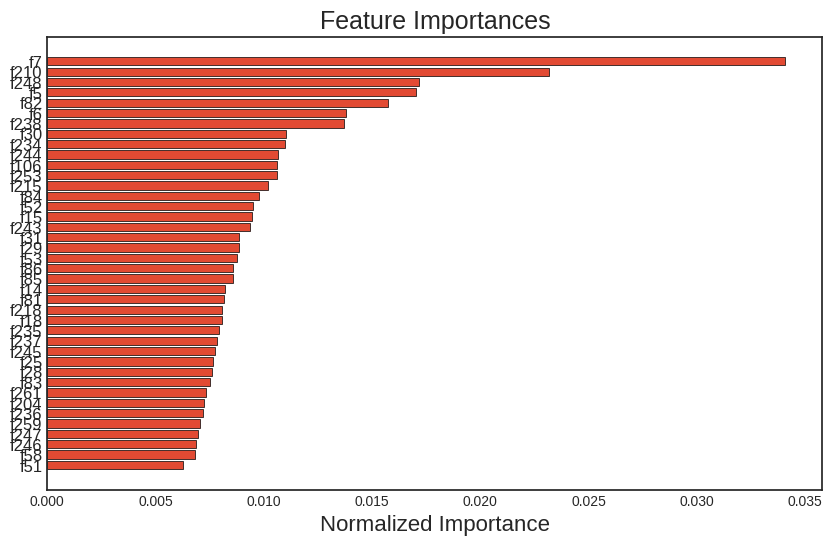

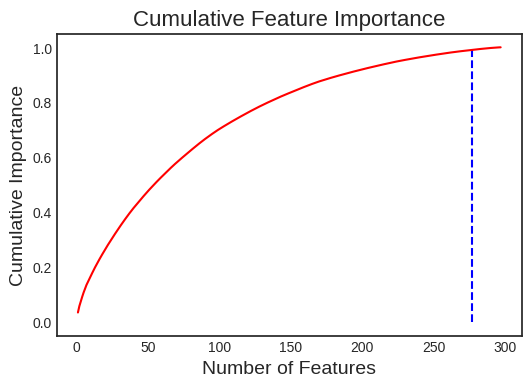

277 features required for 0.99 of cumulative importance


In [34]:
#绘制特征重要性
fs.plot_feature_importances(threshold=0.99,plot_n=40)

# 查看低重要性的特征[PCA]

In [17]:
#查看低重要性的特征[PCA]
fs.identify_low_importance(cumulative_importance=0.99)

276 features required for cumulative importance of 0.99 after one hot encoding.
21 features do not contribute to cumulative importance of 0.99.



In [21]:
low_importance_features = fs.ops['low_importance']

In [32]:
fs.feature_importances.head(20)

,feature,importance,normalized_importance,cumulative_importance
0,f7,610.9,0.034092,0.034092
1,f210,415.3,0.023177,0.057269
2,f248,307.4,0.017155,0.074424
3,f5,304.7,0.017004,0.091428
4,f82,281.7,0.015721,0.107149
5,f6,246.9,0.013779,0.120928
6,f238,245.2,0.013684,0.134611
7,f30,197.8,0.011039,0.145650
8,f234,196.3,0.010955,0.156605
9,f244,191.0,0.010659,0.167264


In [33]:
list(fs.feature_importances.head(20)['feature'])

['f7',
 'f210',
 'f248',
 'f5',
 'f82',
 'f6',
 'f238',
 'f30',
 'f234',
 'f244',
 'f106',
 'f253',
 'f215',
 'f84',
 'f52',
 'f15',
 'f243',
 'f31',
 'f29',
 'f53']

# 单一的唯一价值特征

In [20]:
fs.identify_single_unique()

0 features with a single unique value.



# 总结

In [23]:
remove_feature = set(missing_features + collinear_features + zero_importance_features + low_importance_features)

In [28]:
joblib.dump(fs,'./fs.model')

['./fs.model',
 './fs.model_01.npy',
 './fs.model_02.npy',
 './fs.model_03.npy',
 './fs.model_04.npy',
 './fs.model_05.npy',
 './fs.model_06.npy',
 './fs.model_07.npy',
 './fs.model_08.npy',
 './fs.model_09.npy',
 './fs.model_10.npy',
 './fs.model_11.npy',
 './fs.model_12.npy',
 './fs.model_13.npy',
 './fs.model_14.npy',
 './fs.model_15.npy',
 './fs.model_16.npy',
 './fs.model_17.npy',
 './fs.model_18.npy',
 './fs.model_19.npy',
 './fs.model_20.npy',
 './fs.model_21.npy',
 './fs.model_22.npy',
 './fs.model_23.npy',
 './fs.model_24.npy',
 './fs.model_25.npy',
 './fs.model_26.npy',
 './fs.model_27.npy',
 './fs.model_28.npy',
 './fs.model_29.npy',
 './fs.model_30.npy',
 './fs.model_31.npy',
 './fs.model_32.npy',
 './fs.model_33.npy',
 './fs.model_34.npy',
 './fs.model_35.npy',
 './fs.model_36.npy',
 './fs.model_37.npy']

In [29]:
#Add the following line to Lib/data.py
NOT_IMP_FEATURE =['f114', 'f231', 'f280', 'f154', 'f251', 'f208', 'f127', 'f292', 'f157', 'f223', 'f189', 'f229', 'f255', 'f51', 'f230', 'f253', 'f27', 'f143', 'f39', 'f120', 'f209', 'f67', 'f146', 'f142', 'f59', 'f121', 'f22', 'f151', 'f248', 'f293', 'f125', 'f232', 'f165', 'f200', 'f290', 'f40', 'f225', 'f35', 'f136', 'f69', 'f138', 'f135', 'f26', 'f49', 'f163', 'f145', 'f227', 'f139', 'f252', 'f118', 'f164', 'f113', 'f116', 'f119', 'f222', 'f242', 'f297', 'f206', 'f152', 'f47', 'f243', 'f218', 'f46', 'f207', 'f131', 'f214', 'f140', 'f115', 'f130', 'f228', 'f213', 'f45', 'f294', 'f37', 'f250', 'f238', 'f70', 'f249', 'f272', 'f126', 'f281', 'f124', 'f42', 'f128', 'f122', 'f38', 'f148', 'f166', 'f137', 'f147', 'f123', 'f133', 'f60', 'f149', 'f217', 'f112', 'f268', 'f144', 'f287', 'f220', 'f36', 'f109', 'f44', 'f221', 'f50', 'f216', 'f226', 'f153', 'f48', 'f111', 'f54', 'f129', 'f23', 'f75', 'f233', 'f43', 'f41', 'f224', 'f247', 'f74', 'f63', 'f117', 'f196', 'f289', 'f211', 'f246', 'f141', 'f295', 'f286', 'f288', 'f71', 'f212', 'f132', 'f150']

# 处理Categorical 特征

In [51]:
unique_dict = {}
NOT_FEATURE = atecml.data.NOT_FEATURE_COLUMNS+ NOT_IMP_FEATURE
features = [x for x in train_df.columns if x not in NOT_FEATURE]

Category_Feature_list =[]
for item in  features:
    col_unique_count = len(train_df[item].unique())
    unique_dict[item] = col_unique_count
    if (col_unique_count < 16):
        Category_Feature_list.append(item)


In [52]:
Category_Feature_list

['f1',
 'f2',
 'f3',
 'f4',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f28',
 'f29',
 'f61',
 'f87',
 'f88',
 'f89',
 'f90',
 'f98',
 'f99',
 'f155',
 'f156',
 'f158',
 'f159',
 'f160',
 'f167',
 'f168',
 'f169',
 'f170',
 'f171',
 'f172',
 'f173',
 'f174',
 'f175',
 'f176',
 'f177',
 'f179',
 'f180',
 'f181',
 'f182',
 'f183',
 'f186',
 'f187',
 'f188',
 'f190',
 'f191',
 'f194',
 'f195',
 'f197',
 'f198',
 'f199',
 'f201',
 'f202',
 'f203',
 'f254',
 'f256',
 'f257',
 'f258',
 'f267',
 'f269',
 'f273',
 'f274',
 'f275',
 'f276',
 'f277']